### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


#1. Análise do faturamento loja






In [72]:

preco_sum = loja['Preço'].sum()

print(f"O faturamento total da loja 1 é de R${preco_sum:,.2f}")

O faturamento total da loja 1 é de R$1,534,509.12


In [81]:

preco_sum = loja2['Preço'].sum()

print(f"O faturamento total da loja 2 é de R${preco_sum:,.2f}")

O faturamento total da loja 2 é de R$1,488,459.06


In [82]:

preco_sum = loja3['Preço'].sum()

print(f"O faturamento total da loja 3 é de R${preco_sum:,.2f}")

O faturamento total da loja 3 é de R$1,464,025.03


In [163]:

preco_sum = loja4['Preço'].sum()

print(f"O faturamento total da loja 4 é de R${preco_sum:,.2f}")

O faturamento total da loja 4 é de R$1,384,497.58


# 2. Vendas por Categoria


In [77]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = pd.concat([loja, loja2, loja3, loja4])

categorias = sorted(lojas['Categoria do Produto'].unique())

print(f"Existem {len(categorias)} categorias de produtos nas lojas:")
for categoria in categorias:
    print(f"- {categoria}")


Existem 8 categorias de produtos nas lojas:
- brinquedos
- eletrodomesticos
- eletronicos
- esporte e lazer
- instrumentos musicais
- livros
- moveis
- utilidades domesticas


In [145]:
vendas_por_categoria = lojas.groupby('Categoria do Produto')['Preço'].sum()

vendas_por_categoria_ordenadas = vendas_por_categoria.sort_values(ascending=False)

vendas_formatadas = vendas_por_categoria_ordenadas.apply(lambda x: f"R$ {x:,.2f}")

print("Categorias com maior quantidade de vendas:")
vendas_formatadas


Categorias com maior quantidade de vendas:


,Preço
Categoria do Produto,
eletronicos,"R$ 2,214,099.72"
eletrodomesticos,"R$ 1,766,337.03"
moveis,"R$ 1,010,214.00"
instrumentos musicais,"R$ 465,029.67"
esporte e lazer,"R$ 190,635.39"
brinquedos,"R$ 98,140.86"
utilidades domesticas,"R$ 76,773.38"
livros,"R$ 50,260.74"


# 3. Média de Avaliação das Lojas

In [98]:
mean_purchase_rating = loja['Avaliação da compra'].mean()

print(f"A média de avaliação de compra loja 1 é: {mean_purchase_rating}")


A média de avaliação de compra loja 1 é: 3.976685036032217


In [102]:
mean_purchase_rating = loja2['Avaliação da compra'].mean()

print(f"A média de avaliação de compra da loja 2 é: {mean_purchase_rating}")


A média de avaliação de compra da loja 2 é: 4.037303942348453


In [103]:
mean_purchase_rating = loja3['Avaliação da compra'].mean()

print(f"A média de avaliação de compra da loja 3 é: {mean_purchase_rating}")


A média de avaliação de compra da loja 3 é: 4.048325561678677


In [104]:
mean_purchase_rating = loja4['Avaliação da compra'].mean()

print(f"A média de avaliação de compra da loja 4 é: {mean_purchase_rating}")


A média de avaliação de compra da loja 4 é: 3.9957591178965224


# 4. Produtos Mais e Menos Vendidos

In [115]:
product_sales = loja.groupby('Produto')['Quantidade de parcelas'].sum()

most_sold = product_sales.idxmax()
most_sold_quantity = product_sales.max()
least_sold = product_sales.idxmin()
least_sold_quantity = product_sales.min()

print(f"Produto mais vendido (loja 1): {most_sold}, Quantidade: {most_sold_quantity}")
print(f"Produto menos vendido (loja 1): {least_sold}, Quantidade: {least_sold_quantity}")


Produto mais vendido (loja 1): Secadora de roupas, Quantidade: 214
Produto menos vendido (loja 1): Celular ABXY, Quantidade: 78


In [118]:
product_sales = loja2.groupby('Produto')['Quantidade de parcelas'].sum()

most_sold = product_sales.idxmax()
least_sold = product_sales.idxmin()

most_sold_quantity = product_sales.max()
least_sold_quantity = product_sales.min()

print(f"Produto mais vendido (loja 2): {most_sold}, Quantidade: {most_sold_quantity}")
print(f"Produto menos vendido (loja 2): {least_sold}, Quantidade: {least_sold_quantity}")


Produto mais vendido (loja 2): Iniciando em programação, Quantidade: 223
Produto menos vendido (loja 2): Mesa de jantar, Quantidade: 89


In [119]:

product_sales = loja3.groupby('Produto')['Quantidade de parcelas'].sum()

max_sales = product_sales.idxmax()
min_sales = product_sales.idxmin()

max_sales_quantity = product_sales.max()
min_sales_quantity = product_sales.min()

print(f"Produto mais vendido (loja 3): {max_sales} (Quantidade: {max_sales_quantity})")
print(f"Produto menos vendido (loja 3): {min_sales} (Quantidade: {min_sales_quantity})")


Produto mais vendido (loja 3): Bicicleta (Quantidade: 191)
Produto menos vendido (loja 3): TV Led UHD 4K (Quantidade: 94)


In [120]:
product_sales = loja4.groupby('Produto')['Produto'].count()

most_sold_product = product_sales.idxmax()
most_sold_quantity = product_sales.max()

least_sold_product = product_sales.idxmin()
least_sold_quantity = product_sales.min()

print(f"Produto mais vendido (loja 4): {most_sold_product} (Quantidade: {most_sold_quantity})")
print(f"Produto menos vendido (loja 4): {least_sold_product} (Quantidade: {least_sold_quantity})")


Produto mais vendido (loja 4): Cama box (Quantidade: 62)
Produto menos vendido (loja 4): Guitarra (Quantidade: 33)


# 5. Frete Médio por Loja


In [139]:
average_shipping_cost = loja['Frete'].mean()

formatted_shipping_cost = "R$ {:.2f}".format(average_shipping_cost)

print(f"O preço médio de frete da loja 1 é: {formatted_shipping_cost}")

O preço médio de frete da loja 1 é: R$ 34.69


In [140]:
average_shipping_cost = loja2['Frete'].mean()

formatted_shipping_cost = "R$ {:.2f}".format(average_shipping_cost)

print(f"O preço médio de frete da loja 2 é: {formatted_shipping_cost}")

O preço médio de frete da loja 2 é: R$ 33.62


In [142]:
average_shipping_cost = loja3['Frete'].mean()

formatted_shipping_cost = "R$ {:.2f}".format(average_shipping_cost)

print(f"O preço médio de frete da loja 3 é: {formatted_shipping_cost}")

O preço médio de frete da loja 3 é: R$ 33.07


In [143]:
average_shipping_cost = loja4['Frete'].mean()

formatted_shipping_cost = "R$ {:.2f}".format(average_shipping_cost)

print(f"O preço médio de frete da loja 4 é: {formatted_shipping_cost}")

O preço médio de frete da loja 4 é: R$ 31.28


# 6. Graficos

# Grafico de barra

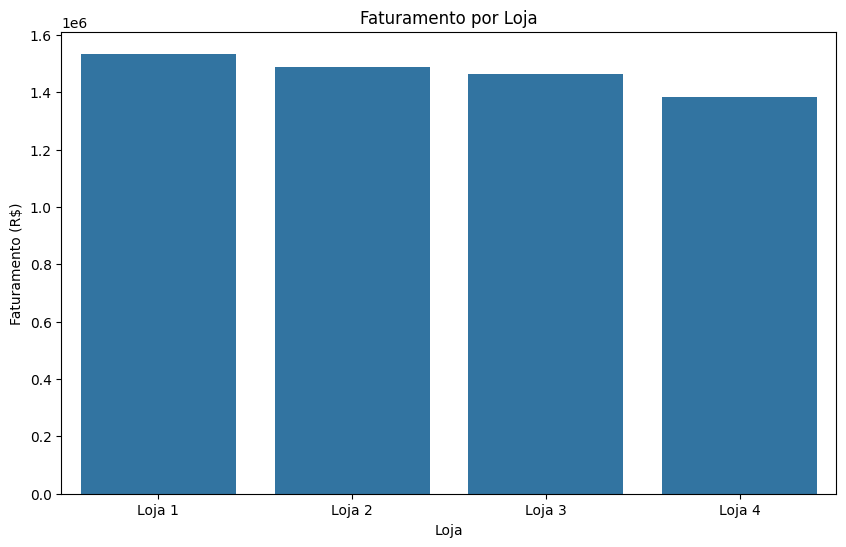

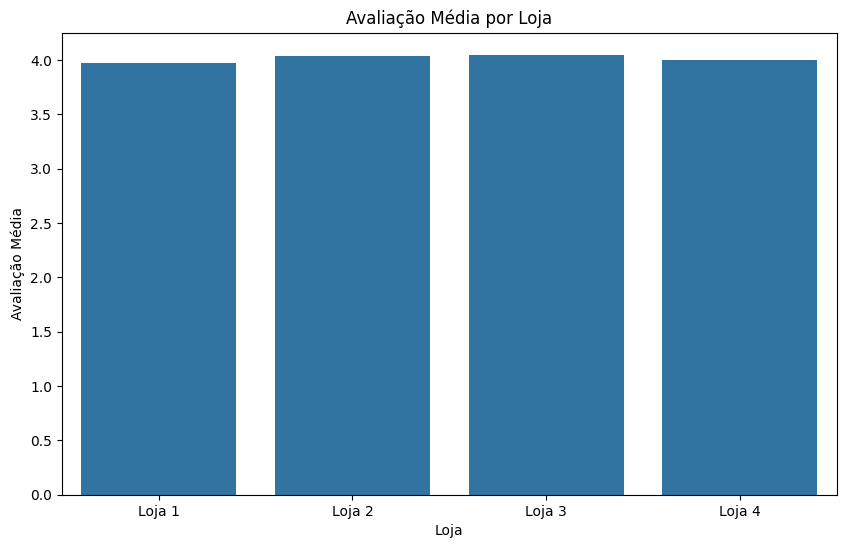

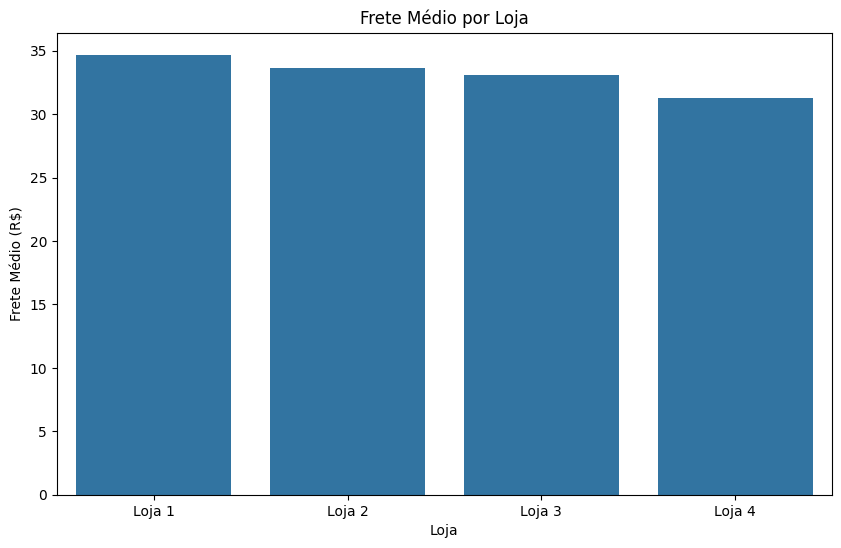

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

avaliacao_loja1 = loja['Avaliação da compra'].mean()
avaliacao_loja2 = loja2['Avaliação da compra'].mean()
avaliacao_loja3 = loja3['Avaliação da compra'].mean()
avaliacao_loja4 = loja4['Avaliação da compra'].mean()

frete_loja1 = loja['Frete'].mean()
frete_loja2 = loja2['Frete'].mean()
frete_loja3 = loja3['Frete'].mean()
frete_loja4 = loja4['Frete'].mean()

dados_dashboard = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento': [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4],
    'Avaliação Média': [avaliacao_loja1, avaliacao_loja2, avaliacao_loja3, avaliacao_loja4],
    'Frete Médio': [frete_loja1, frete_loja2, frete_loja3, frete_loja4]
})


plt.figure(figsize=(10, 6))
sns.barplot(x='Loja', y='Faturamento', data=dados_dashboard)
plt.title('Faturamento por Loja')
plt.ylabel('Faturamento (R$)')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Loja', y='Avaliação Média', data=dados_dashboard)
plt.title('Avaliação Média por Loja')
plt.ylabel('Avaliação Média')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Loja', y='Frete Médio', data=dados_dashboard)
plt.title('Frete Médio por Loja')
plt.ylabel('Frete Médio (R$)')
plt.show()


# Grafico de pizza

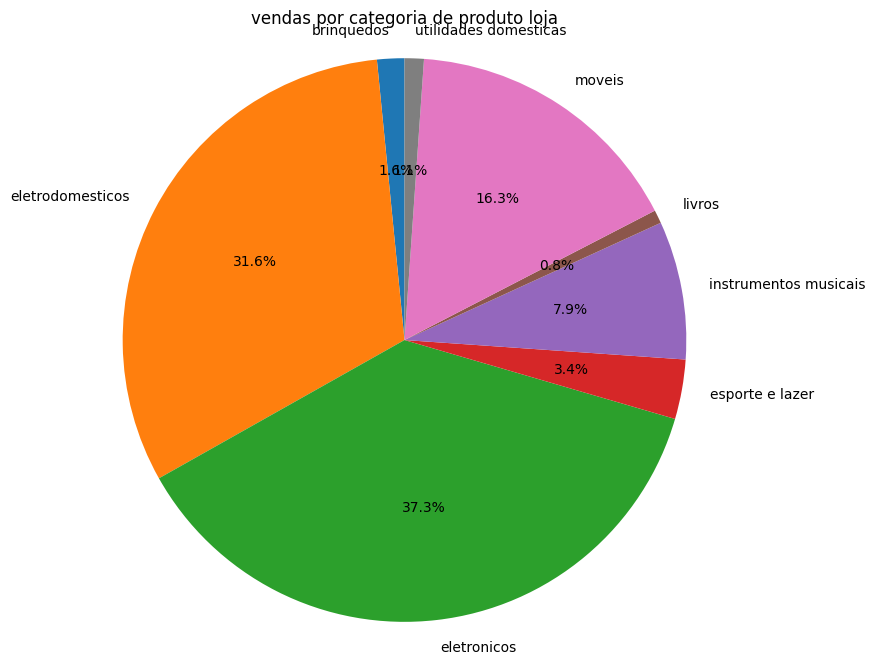

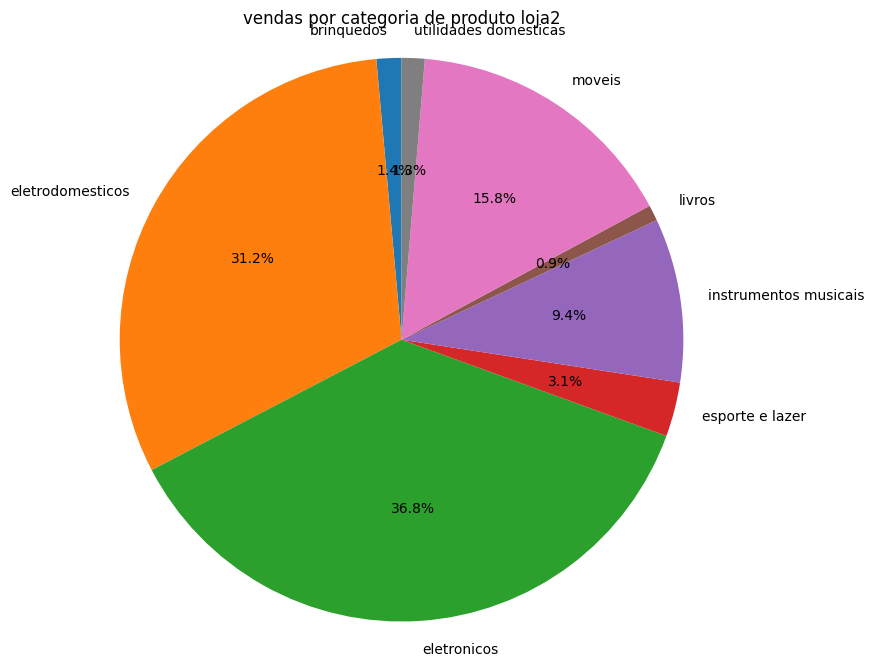

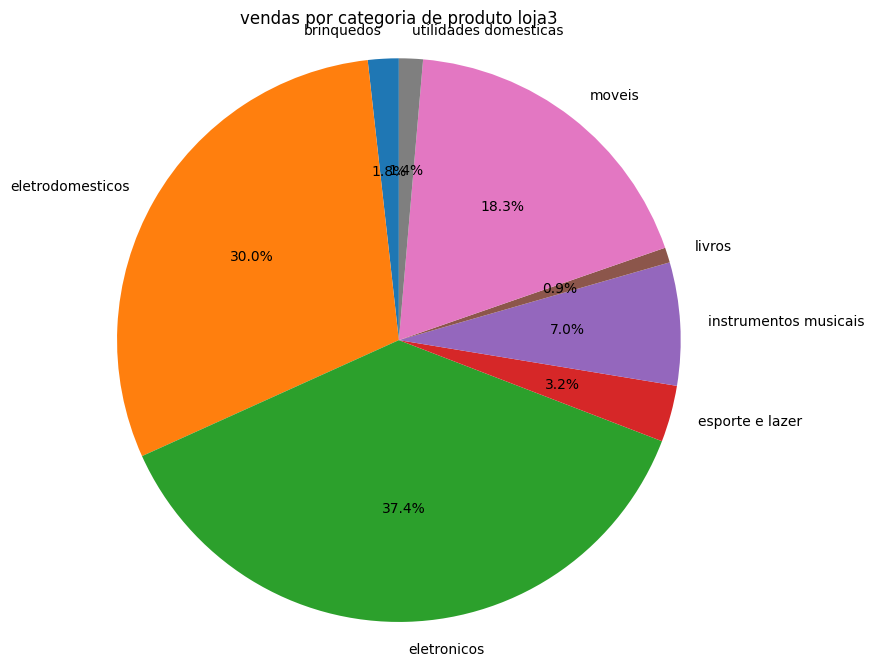

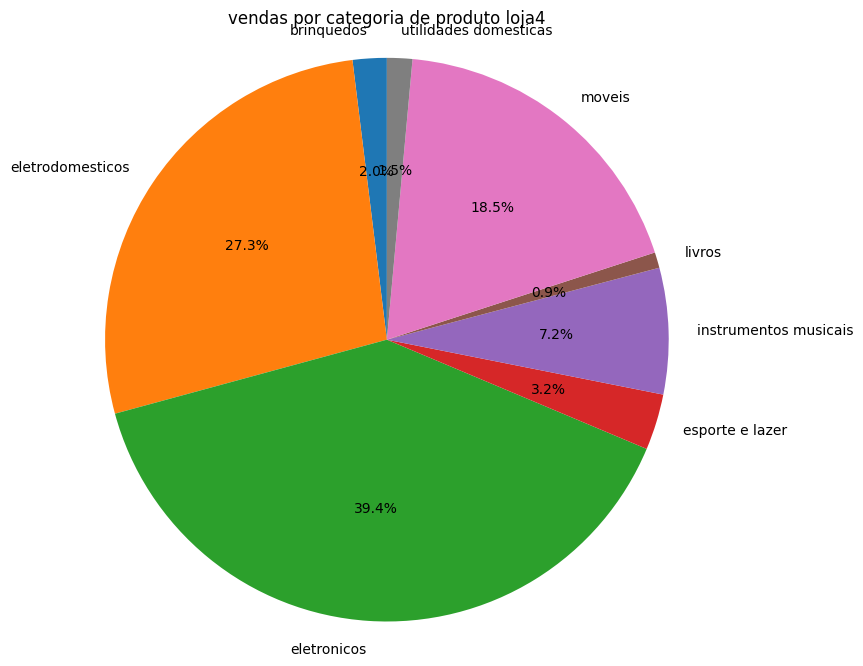

In [164]:
import matplotlib.pyplot as plt
stores = [loja, loja2, loja3, loja4]
store_names = ['loja', 'loja2', 'loja3', 'loja4']

for i, store in enumerate(stores):
    product_category_sales = store.groupby('Categoria do Produto')['Preço'].sum()
    plt.figure(figsize=(8, 8))
    plt.pie(product_category_sales, labels=product_category_sales.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'vendas por categoria de produto {store_names[i]}')
    plt.axis('equal')
    plt.show()


# Analise de pareto

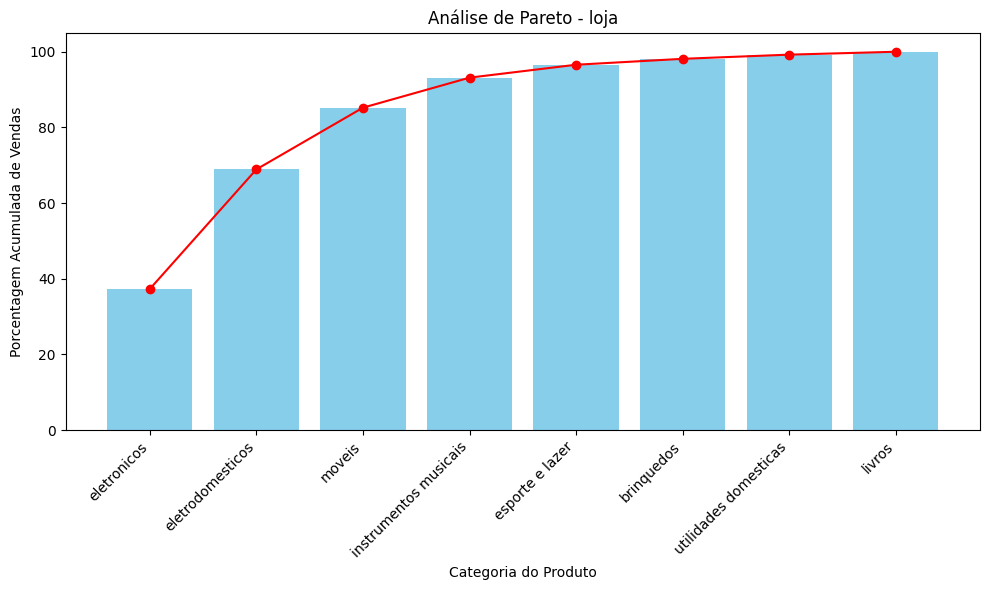


DataFrame da Análise de Pareto para loja:



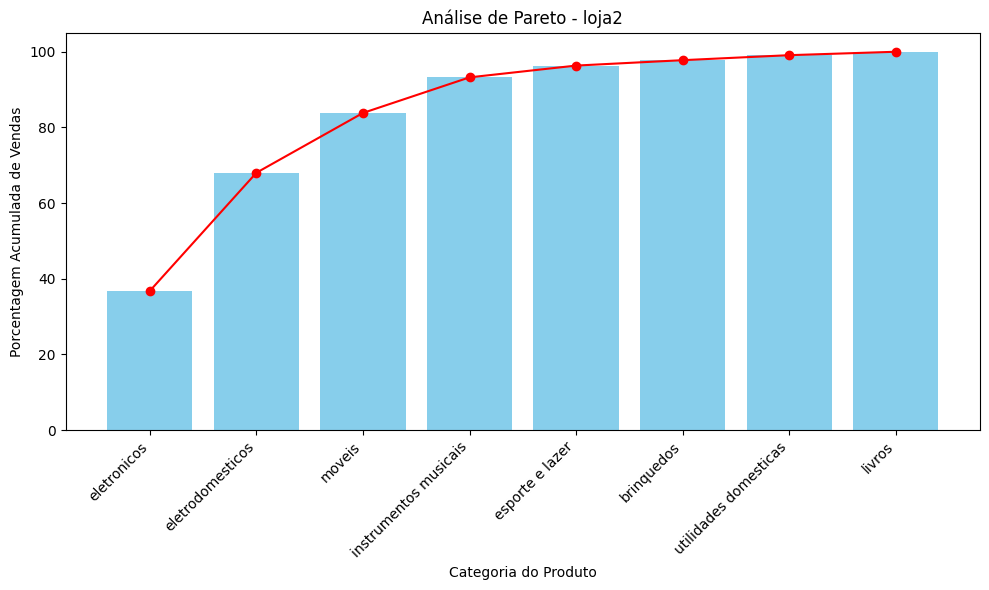


DataFrame da Análise de Pareto para loja2:



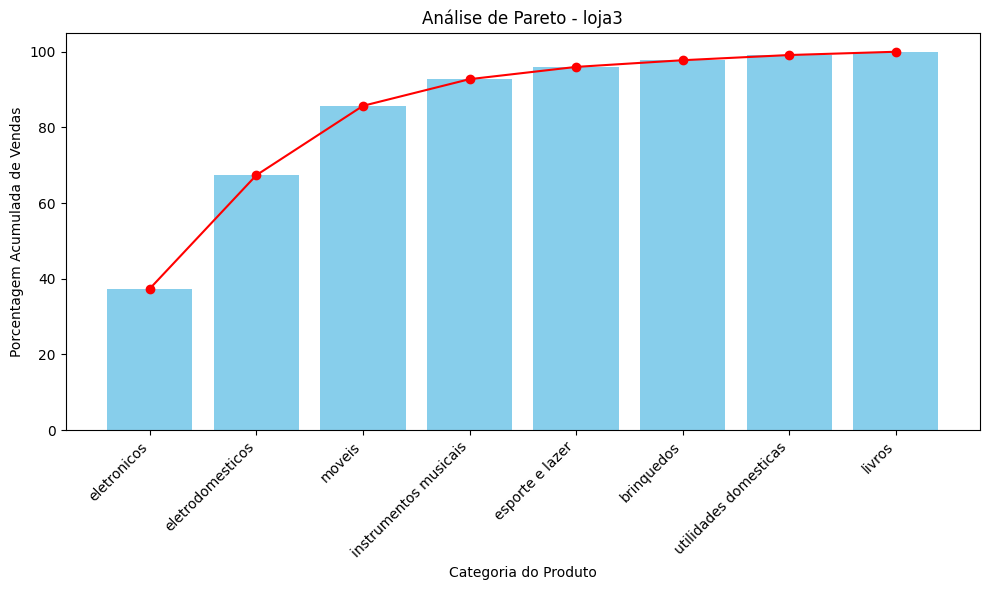


DataFrame da Análise de Pareto para loja3:



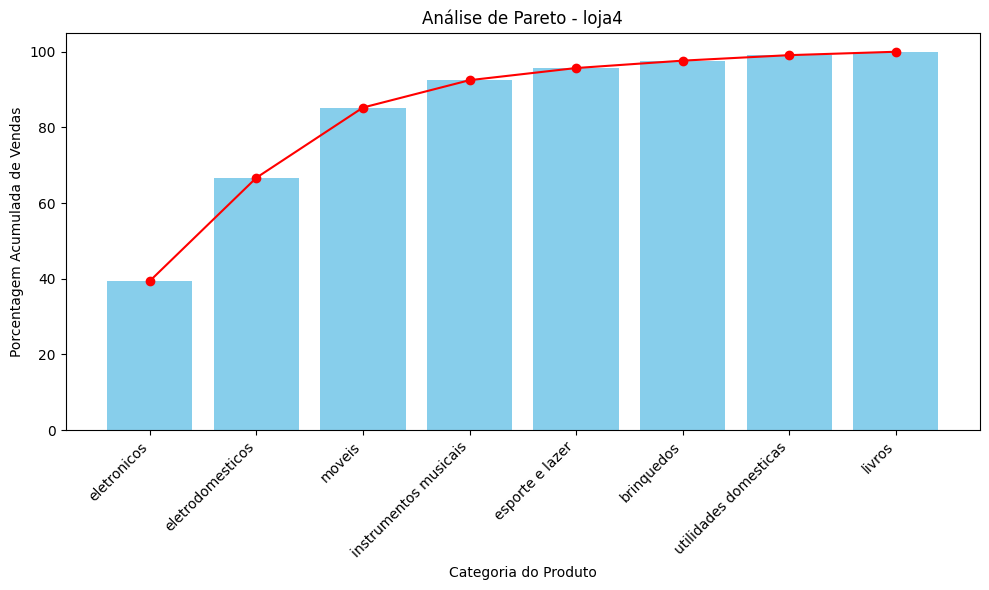


DataFrame da Análise de Pareto para loja4:



,Categoria,Vendas,Porcentagem,Porcentagem Acumulada
0,eletronicos,545966.86,39.434295,39.434295
1,eletrodomesticos,377680.65,27.279257,66.713552
2,moveis,256705.65,18.541430,85.254982
3,instrumentos musicais,100136.50,7.232696,92.487678
4,esporte e lazer,44465.65,3.211681,95.699359
5,brinquedos,27015.67,1.951298,97.650657
6,utilidades domesticas,20098.83,1.451706,99.102362
7,livros,12427.77,0.897638,100.000000


In [162]:
import pandas as pd
import matplotlib.pyplot as plt

for loja_name, loja_data in zip(['loja', 'loja2', 'loja3', 'loja4'], [loja, loja2, loja3, loja4]):

    vendas_por_categoria = loja_data.groupby('Categoria do Produto')['Preço'].sum()

    vendas_por_categoria_ordenadas = vendas_por_categoria.sort_values(ascending=False)

    vendas_por_categoria_ordenadas_percent = vendas_por_categoria_ordenadas / vendas_por_categoria_ordenadas.sum() * 100
    vendas_por_categoria_ordenadas_percent_acumulado = vendas_por_categoria_ordenadas_percent.cumsum()

    pareto_df = pd.DataFrame({
        'Categoria': vendas_por_categoria_ordenadas.index,
        'Vendas': vendas_por_categoria_ordenadas.values,
        'Porcentagem': vendas_por_categoria_ordenadas_percent.values,
        'Porcentagem Acumulada': vendas_por_categoria_ordenadas_percent_acumulado.values
    })

    plt.figure(figsize=(10, 6))
    plt.bar(pareto_df['Categoria'], pareto_df['Porcentagem Acumulada'], color='skyblue')
    plt.plot(pareto_df['Categoria'], pareto_df['Porcentagem Acumulada'], color='red', marker='o')
    plt.xlabel('Categoria do Produto')
    plt.ylabel('Porcentagem Acumulada de Vendas')
    plt.title(f'Análise de Pareto - {loja_name}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"\nDataFrame da Análise de Pareto para {loja_name}:\n")
pareto_df


# Recomendação para o Seu João: Venda da Loja 4

Após analisar os dados de suas quatro lojas, chego à recomendação de que o Seu João venda a Loja 4. Essa decisão se baseia em alguns fatores que demonstram um desempenho inferior dessa loja em comparação com as demais.

Primeiramente, a Loja 4 apresenta o menor faturamento entre as quatro, indicando uma menor lucratividade e potencial de retorno financeiro. A busca por otimizar os negócios e aumentar a rentabilidade direciona a atenção para as lojas com maior desempenho.

Em segundo lugar, observamos um desalinhamento entre os produtos vendidos na Loja 4 e as categorias mais lucrativas do mercado. A categoria "Eletrônicos" destaca-se como a mais vendida, porém o produto mais vendido na Loja 4 é "Cama Box". Essa discrepância pode ser um fator crucial para o baixo faturamento da loja, indicando a necessidade de uma mudança estratégica para se adequar às demandas do mercado.

Além disso, a Loja 4 possui a segunda menor avaliação média de compra, o que demonstra uma menor satisfação dos clientes em comparação com as outras lojas. A avaliação da compra é um reflexo da experiência do cliente e impacta diretamente as vendas e a fidelização. Buscar lojas com maior índice de satisfação do cliente é crucial para o sucesso do negócio.

Embora a Loja 4 possua o frete mais barato, esse fator, isoladamente, não compensa os outros pontos negativos já mencionados. O baixo faturamento, o desalinhamento com a categoria mais vendida e a baixa avaliação da compra são fatores mais relevantes na decisão de venda, pois impactam diretamente a lucratividade e o potencial de crescimento da loja.

Portanto, a venda da Loja 4 permitirá ao Seu João concentrar seus esforços e recursos nas lojas mais lucrativas e com maior potencial de crescimento. Essa decisão estratégica visa otimizar os negócios, aumentar a rentabilidade e garantir a sustentabilidade a longo prazo.

Acredito que essa recomendação, fundamentada em dados e análises, auxiliará o Seu João na tomada de decisão, permitindo que ele direcione seus investimentos para as lojas com maior potencial de sucesso.

